<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Advanced Data Science

Project #3

02/14/2022

In [147]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import table and show description of table atrributes
dataFrame = pd.read_csv("https://raw.githubusercontent.com/zachmakki15/ADVDS/main/heart.csv")
dataFrame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data in the table has a wide range with mean values for some columns less then 1 and others more then 130. This data will need to be normalized.

In [148]:
#Display top of table
dataFrame.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [149]:
#Display column info to look for missing values
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All columns have 303 values so it seems as though there are no missing values in this dataset, but if one examines the data further they will find that one column contains 0s that shouldn't and that is the thal column

In [150]:
#Show value count for thal column
dataFrame['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Lets replace the missing values (0) with the most frequently occuring number in the column. The categories in the column are 1,2 or 3

In [151]:
#Replace missing values in thal column with 3
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=0)
imputer.fit(dataFrame[['thal']])
dataFrame[['thal']] = imputer.transform(dataFrame[['thal']])
dataFrame['thal'].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

Missing values in thal are now replaced, lets plot the age distribution for the age and sex attributes broken down by target class (0 or 1)

In [152]:
#Plot the age and sex distribution data for both target values (0,1)
#First target class 0
dataFrame_tar0 = dataFrame.query('target == 0')
dataFrame_tar0['target'].value_counts()
dataFrame_tar0.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.557971,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.650863,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [153]:
#Second target class 1
dataFrame_tar1 = dataFrame.query('target == 1')
dataFrame_tar1['target'].value_counts()
dataFrame_tar1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.133333,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.435237,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d677c9d0>,
      dtype=object)

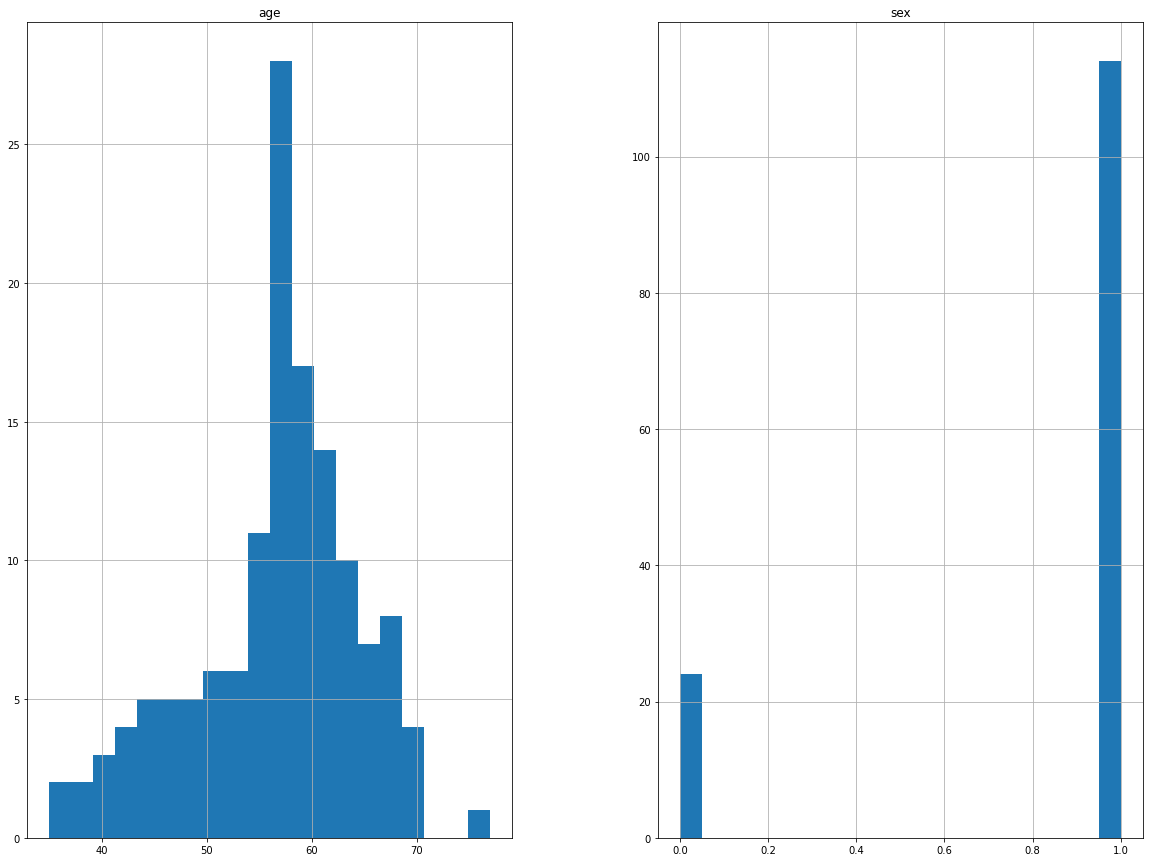

In [154]:
#Plot histogram for target class 0
dataFrame_tar0.hist(column=['age','sex'], bins=20, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d6bf21d0>,
      dtype=object)

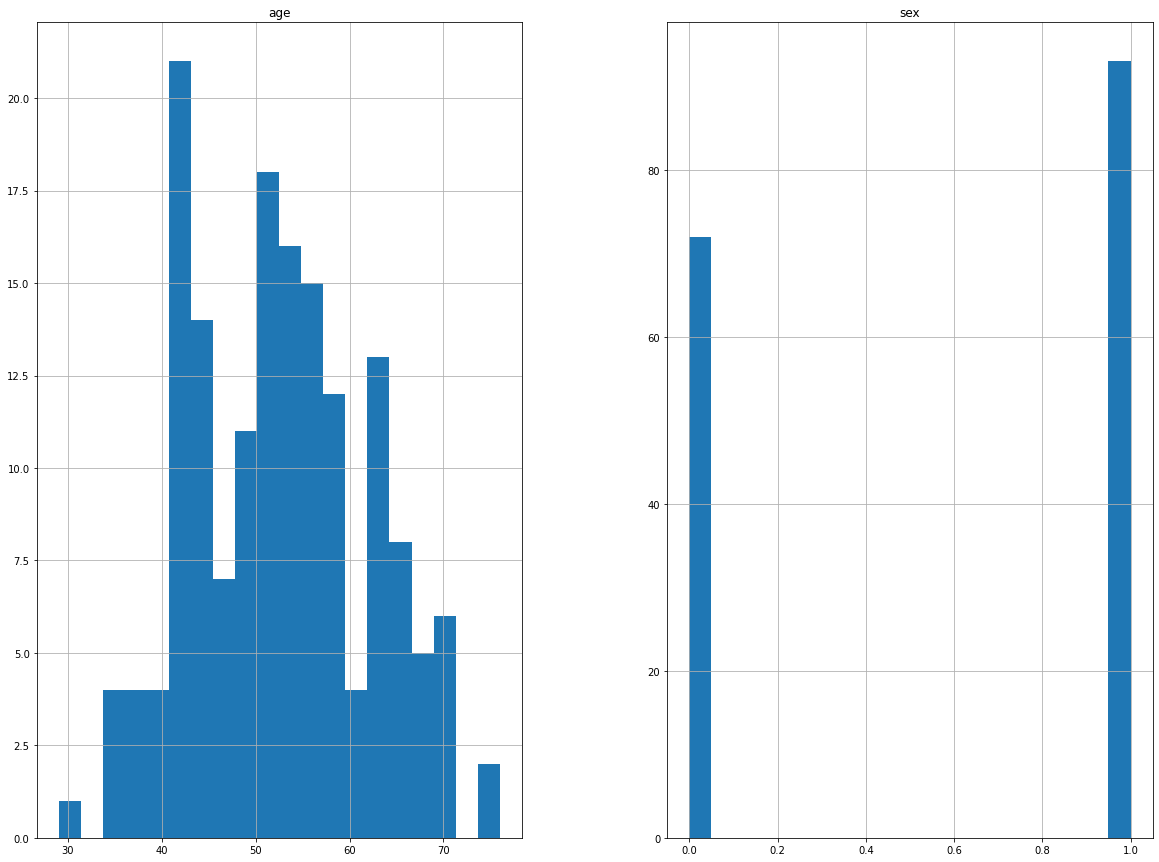

In [92]:
#Plot the historgram for target class 1
dataFrame_tar1.hist(column=['age','sex'], bins=20, figsize=(20,15))

Just from a quick glance at the histograms above it seems like the data in this table is not properly distributed by sex, age looks to be more properly distributed in both target class 0 and target class 1 dataframes

In [155]:
#Show original dataframe value counts for sex column
dataFrame['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

Lets examine the rest of the attributes in this dataset by checking the pearsons correlation of the attributes in relation to target

In [156]:
#Get pearsons r correlation for all attributes
corr_matrix = dataFrame.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.363322
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

There seems to be a mild correlation between columns cp, thalach, and slope and the target column, there also seems to be a mild negative correlation between columns oldpeak, exang and column targets

To further visually inspect the correlation of each attribute we will use a heat map of the correlation matrix

In [157]:
#Plot correlation for each attribute
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.169125,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.087866,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.013795,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.115310,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.225508,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210236,-0.430696


Alot of the columns in this dataset are catorgorical numerical columns, such as 0 and 1 for sex, values 0-3 for chest pain and so on. The only columns that should be normalized are the continous numerical columns, which from a quick examination of the data are age, trestbps, chol, thalach, and oldpeak

In [158]:
#Create dataframe for continuous values only
dataFrame_cont = dataFrame[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
dataFrame_cont.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Now lets normalize these values using log(x+1)

In [159]:
#Normalize data
dataFrame_cont = np.log10(dataFrame_cont + 1)
dataFrame_cont.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,1.737078,2.118963,2.384163,2.172470,0.247524
std,0.074556,0.056115,0.088141,0.071021,0.227716
min,1.477121,1.977724,2.103804,1.857332,0.000000
25%,1.685719,2.082785,2.326336,2.128719,0.000000
50%,1.748188,2.117271,2.382017,2.187521,0.255273
75%,1.792392,2.149219,2.440121,2.222716,0.414973
max,1.892095,2.303196,2.752048,2.307496,0.857332


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2ec4df750>,
      dtype=object)

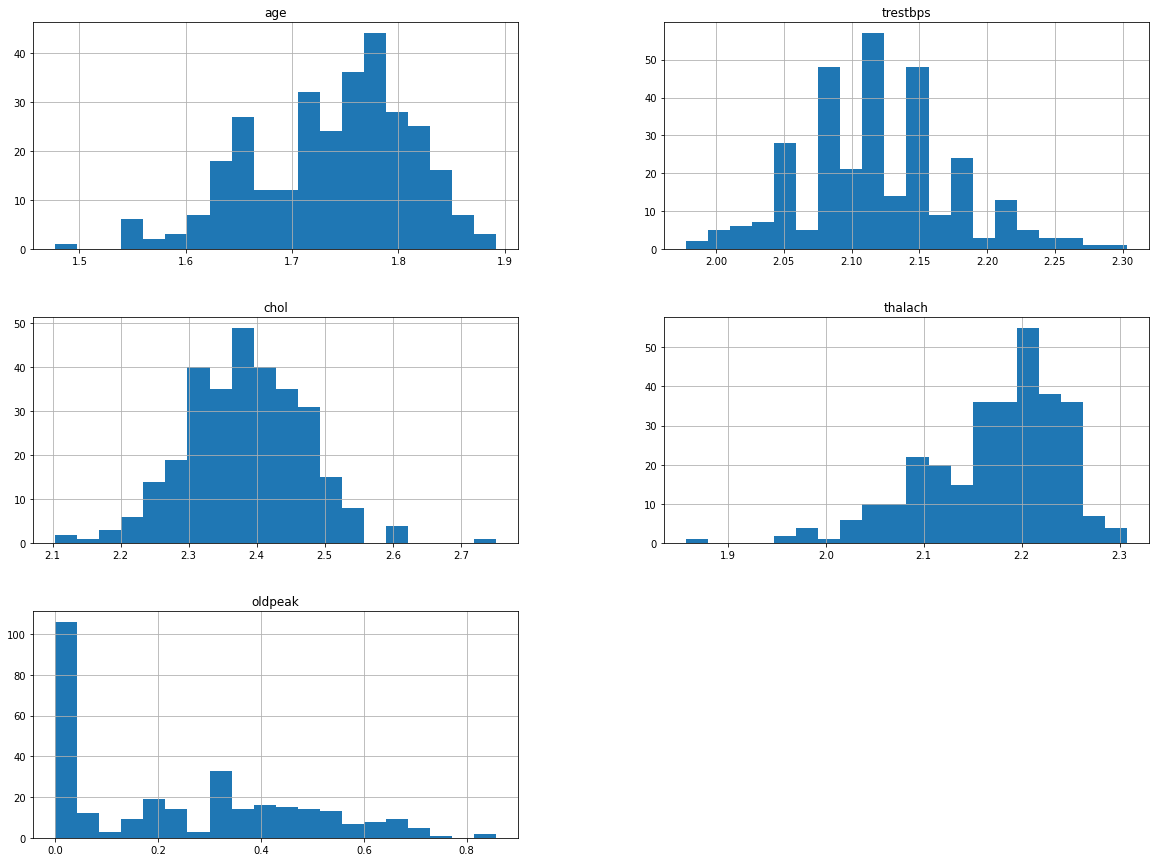

In [160]:
#Plot histograms for normalized data
dataFrame_cont.hist(bins=20,figsize=(20,15))

In [161]:
#Merge the normalized columns back into a new dataset with the remaining non-normalized columns from the orginial dataset
dataFrame_norm = dataFrame.copy()
dataFrame_norm['age'] = dataFrame_cont['age']
dataFrame_norm['trestbps'] = dataFrame_cont['trestbps']
dataFrame_norm['chol'] = dataFrame_cont['chol']
dataFrame_norm['thalach'] = dataFrame_cont['thalach']
dataFrame_norm['oldpeak'] = dataFrame_cont['oldpeak']
dataFrame_norm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,1.737078,0.683168,0.966997,2.118963,2.384163,0.148515,0.528053,2.172470,0.326733,0.247524,1.399340,0.729373,2.326733,0.544554
std,0.074556,0.466011,1.032052,0.056115,0.088141,0.356198,0.525860,0.071021,0.469794,0.227716,0.616226,1.022606,0.583020,0.498835
min,1.477121,0.000000,0.000000,1.977724,2.103804,0.000000,0.000000,1.857332,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.685719,0.000000,0.000000,2.082785,2.326336,0.000000,0.000000,2.128719,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.748188,1.000000,1.000000,2.117271,2.382017,0.000000,1.000000,2.187521,0.000000,0.255273,1.000000,0.000000,2.000000,1.000000
75%,1.792392,1.000000,2.000000,2.149219,2.440121,0.000000,1.000000,2.222716,1.000000,0.414973,2.000000,1.000000,3.000000,1.000000
max,1.892095,1.000000,3.000000,2.303196,2.752048,1.000000,2.000000,2.307496,1.000000,0.857332,2.000000,4.000000,3.000000,1.000000


Lets see if the correlation has changed at all with the normalization

In [162]:
corr_matrix = dataFrame_norm.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.413464
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.092856
trestbps   -0.142387
age        -0.232071
sex        -0.280937
thal       -0.363322
ca         -0.391724
oldpeak    -0.432092
exang      -0.436757
Name: target, dtype: float64

No major change in correlation

The data is now ready to be split into train and test sets and modeled

#Logistic Regression w/Scaled Data

In [163]:
#Create dataframe without the target column for x
#y is the target column
dataFrame_noTarget = dataFrame_norm.drop(columns=['target'])
x = dataFrame_noTarget
y = dataFrame_norm['target']
x.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.806180,1,3,2.164353,2.369216,1,0,2.178977,0,0.518514,0,0,1
1,1.579784,1,2,2.117271,2.399674,0,1,2.274158,0,0.653213,0,0,2
2,1.623249,0,1,2.117271,2.311754,0,0,2.238046,0,0.380211,2,0,2
3,1.755875,1,1,2.082785,2.374748,0,1,2.252853,0,0.255273,2,0,2
4,1.763428,0,0,2.082785,2.550228,0,1,2.214844,1,0.204120,2,0,2
5,1.763428,1,0,2.149219,2.285557,0,1,2.173186,0,0.146128,1,0,1
6,1.755875,0,1,2.149219,2.469822,0,0,2.187521,0,0.361728,1,0,2
7,1.653213,1,1,2.082785,2.421604,0,1,2.240549,0,0.000000,2,0,3
8,1.724276,1,2,2.238046,2.301030,1,1,2.212188,0,0.176091,2,0,3
9,1.763428,1,2,2.178977,2.227887,0,1,2.243038,0,0.414973,2,0,2


Train Accuracy:  0.83
Test Accuracy: 0.89
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Text(0.5, 15.0, 'Predicted')

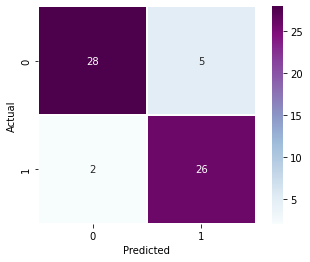

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#Split the data into 80/20 train test split and run the logistic regression
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 100)
#Use lasso regression with liblinear solver, this data set is somewhat small so only paralize over 3 processes
#Test comparing liblinear to saga showed liblinear performed better on this dataset, it also performed better then the default solver
lgClassifier = LogisticRegression(penalty='l1', solver='liblinear', n_jobs=3, max_iter=2000, tol=0.1)
lgClassifier.fit(xTrain, yTrain)
lgTrainScore = round(lgClassifier.score(xTrain, yTrain), 2)
lgTestScore = round(lgClassifier.score(xTest, yTest), 2)
lgYPred = lgClassifier.predict(xTest)

#Create confusion matrix
labels = [0,1]
confusionMatrix = confusion_matrix(yTest, lgYPred, labels=labels)

#Get classification report
classReport = classification_report(y_true=yTest, y_pred = lgYPred, labels = labels)

#Print results
print ('Train Accuracy: ', lgTrainScore)
print ('Test Accuracy:', lgTestScore)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(confusionMatrix, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [166]:
#Show classification report
print(classReport)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



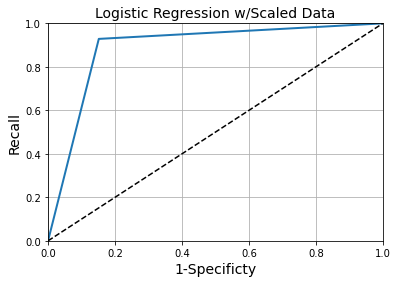

In [167]:
#Display the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(yTest,lgYPred)

#Use method for roc plot
def plot_roc_curve(fpr, tpr, title, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('1-Specificty', fontsize=14)
    plt.ylabel('Recall', fontsize=14)
    plt.title(title, fontsize=14)
    plt.grid(True) 

#Call method
plot_roc_curve(fpr, tpr, "Logistic Regression w/Scaled Data")

#SGD Classifier w/Scaled Data

Train Accuracy: 0.83
Test Accuracy: 0.85
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


Text(0.5, 15.0, 'Predicted')

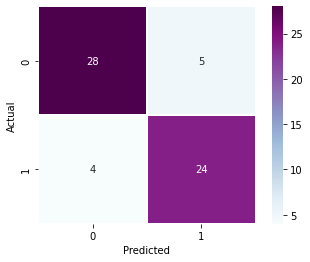

In [168]:
#Import the classifier and create the model
from sklearn.linear_model import SGDClassifier
sgdClassifier = SGDClassifier(max_iter=1000, tol=0.1, random_state=120, n_jobs=3)
sgdClassifier.fit(xTrain, yTrain)
sgdTrainScore = round(sgdClassifier.score(xTrain, yTrain), 2)
sgdTestScore = round(sgdClassifier.score(xTest, yTest), 2)
sgdYPred = sgdClassifier.predict(xTest)

#Create confusion matrix
labels = [0,1]
sgdConfusionMatrix = confusion_matrix(yTest, sgdYPred, labels=labels)

#Get classification report
sgdClassReport = classification_report(y_true=yTest, y_pred = sgdYPred, labels = labels)

#Print results
print ('Train Accuracy:', sgdTrainScore)
print ('Test Accuracy:', sgdTestScore)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(sgdConfusionMatrix, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(sgdConfusionMatrix, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [169]:
#Show classification report
print(sgdClassReport)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



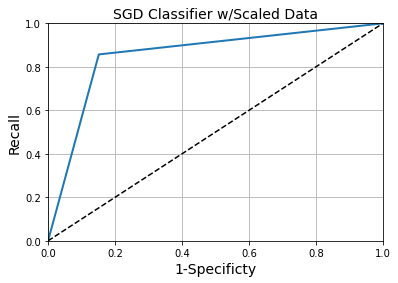

In [170]:
#Plot the roc curve
fpr, tpr, thresholds = roc_curve(yTest,sgdYPred)
plot_roc_curve(fpr, tpr, "SGD Classifier w/Scaled Data")

#Random Forest W/Scaled Data

Train Accuracy:  1.0
Test Accuracy: 0.85
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


Text(0.5, 15.0, 'Predicted')

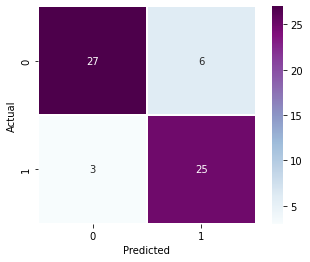

In [171]:
#import the random forest and create the model
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(n_estimators=105, n_jobs=3)
rfClassifier.fit(xTrain,yTrain)
rfTrainScore = round(rfClassifier.score(xTrain, yTrain), 2)
rfTestScore = round(rfClassifier.score(xTest, yTest), 2)
rfYPred = rfClassifier.predict(xTest)

#Create confusion matrix
labels = [0,1]
rfConfusionMatrix = confusion_matrix(yTest, rfYPred, labels=labels)

#Get classification report
rfClassReport = classification_report(y_true=yTest, y_pred = rfYPred, labels = labels)

#Print results
print ('Train Accuracy: ', rfTrainScore)
print ('Test Accuracy:', rfTestScore)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(rfConfusionMatrix, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(rfConfusionMatrix, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [172]:
#Show classification report
print(rfClassReport)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



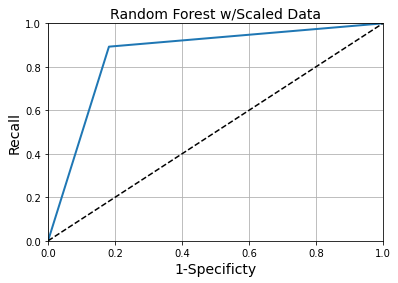

In [173]:
#Plot roc curve
fpr, tpr, thresholds = roc_curve(yTest,rfYPred)
plot_roc_curve(fpr, tpr, "Random Forest w/Scaled Data")

Lets run the same three models with the original dataset to check if the scaling of continous columns helped or hurt the models accuracy

#Logisitic Regression W/Non-scaled data

In [174]:
#Replace x and y with non-scaled data
dataFrame_noTarget = dataFrame.drop(columns=['target'])
x = dataFrame_noTarget
y = dataFrame['target']
x.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


Train Accuracy: 0.87
Test Accuracy: 0.89
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs))


Text(0.5, 15.0, 'Predicted')

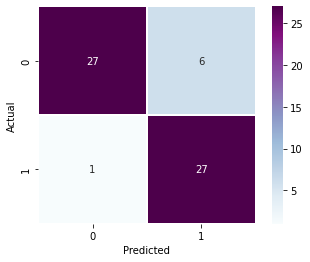

In [175]:
#Split the data into 80/20 train test split and run the logistic regression
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 100)
#Use lasso regression with liblinear solver, this data set is somewhat small so only paralize over 3 processes
#Test comparing liblinear to saga showed liblinear performed better on this dataset, it also performed better then the default solver
lgClassifier_nonNorm = LogisticRegression(penalty='l1', solver='liblinear', n_jobs=3, max_iter=2000, tol=0.1)
lgClassifier_nonNorm.fit(xTrain, yTrain)
lgTrainScore_nonNorm = round(lgClassifier_nonNorm.score(xTrain, yTrain), 2)
lgTestScore_nonNorm = round(lgClassifier_nonNorm.score(xTest, yTest), 2)
lgYPred_nonNorm = lgClassifier_nonNorm.predict(xTest)

#Create confusion matrix
labels = [0,1]
confusionMatrix_nonNorm = confusion_matrix(yTest, lgYPred_nonNorm, labels=labels)

#Get classification report
lgclassReport_nonNorm = classification_report(y_true=yTest, y_pred = lgYPred_nonNorm, labels = labels)

#Print results
print ('Train Accuracy:', lgTrainScore_nonNorm)
print ('Test Accuracy:', lgTestScore_nonNorm)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(confusionMatrix_nonNorm, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(confusionMatrix_nonNorm, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [176]:
#Print classification report
print(lgclassReport_nonNorm)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



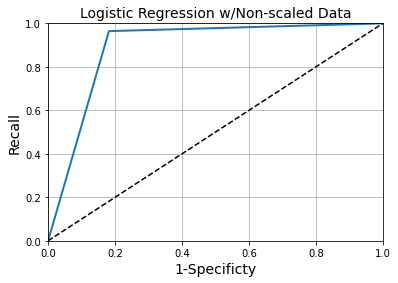

In [177]:
#Plot roc curve
fpr, tpr, thresholds = roc_curve(yTest,lgYPred_nonNorm)
plot_roc_curve(fpr, tpr, "Logistic Regression w/Non-scaled Data")

#SGD Classifier w/Non-Scaled Data

Train Accuracy:  0.64
Test Accuracy: 0.61
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


Text(0.5, 15.0, 'Predicted')

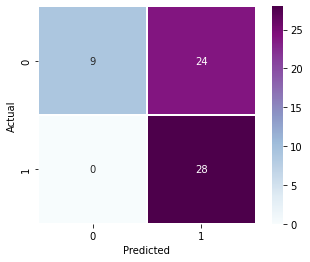

In [178]:
sgdClassifier_nonNorm = SGDClassifier(max_iter=2000, random_state=40, n_jobs=3)
sgdClassifier_nonNorm.fit(xTrain, yTrain)
sgdTrainScore_nonNorm = round(sgdClassifier_nonNorm.score(xTrain, yTrain), 2)
sgdTestScore_nonNorm = round(sgdClassifier_nonNorm.score(xTest, yTest), 2)
sgdYPred_nonNorm = sgdClassifier_nonNorm.predict(xTest)

#Create confusion matrix
labels = [0,1]
sgdConfusionMatrix_nonNorm = confusion_matrix(yTest, sgdYPred_nonNorm, labels=labels)

#Get classification report
sgdClassReport_nonNorm = classification_report(y_true=yTest, y_pred = sgdYPred_nonNorm, labels = labels)

#Print results
print ('Train Accuracy: ', sgdTrainScore_nonNorm)
print ('Test Accuracy:', sgdTestScore_nonNorm)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(sgdConfusionMatrix_nonNorm, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(sgdConfusionMatrix_nonNorm, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [179]:
#Print classification report
print(sgdClassReport_nonNorm)

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        33
           1       0.54      1.00      0.70        28

    accuracy                           0.61        61
   macro avg       0.77      0.64      0.56        61
weighted avg       0.79      0.61      0.55        61



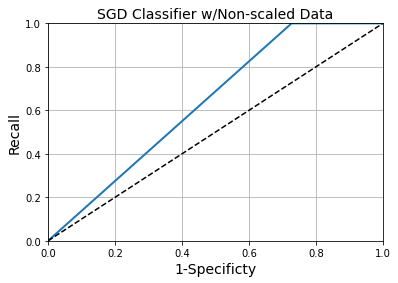

In [180]:
#Plot roc curve
fpr, tpr, thresholds = roc_curve(yTest,sgdYPred_nonNorm)
plot_roc_curve(fpr, tpr, "SGD Classifier w/Non-scaled Data")

#Random Forest W/Non-scaled Data

Train Accuracy:  1.0
Test Accuracy:  0.89
#Total cases (303, 13)
#Training and testing cases (242, 13) (61, 13)
Confusion matrix:


Text(0.5, 15.0, 'Predicted')

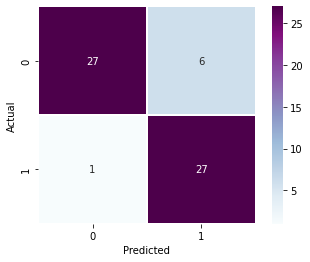

In [181]:
rfClassifier_nonNorm = RandomForestClassifier(n_estimators=105, n_jobs=3)
rfClassifier_nonNorm.fit(xTrain,yTrain)
rfTrainScore_nonNorm = round(rfClassifier_nonNorm.score(xTrain, yTrain), 2)
rfTestScore_nonNorm = round(rfClassifier_nonNorm.score(xTest, yTest), 2)
rfYPred_nonNorm = rfClassifier_nonNorm.predict(xTest)

#Create confusion matrix
labels = [0,1]
rfConfusionMatrix_nonNorm = confusion_matrix(yTest, rfYPred_nonNorm, labels=labels)

#Get classification report
rfClassReport_nonNorm = classification_report(y_true=yTest, y_pred = rfYPred_nonNorm, labels = labels)

#Print results
print ('Train Accuracy: ', rfTrainScore_nonNorm)
print ('Test Accuracy: ', rfTestScore_nonNorm)
print ('#Total cases', x.shape)
print ('#Training and testing cases', xTrain.shape, xTest.shape)
print ('Confusion matrix:')
pd.DataFrame(rfConfusionMatrix_nonNorm, index=labels, columns=labels)

#Plot confusion matrix
sns.heatmap(rfConfusionMatrix_nonNorm, annot=True, linewidths=.5, square = True, cmap="BuPu")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [182]:
#Print classification report
print(rfClassReport_nonNorm)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



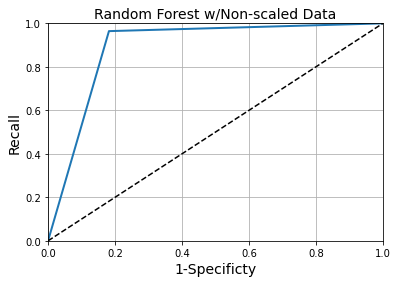

In [183]:
#Plot the roc curve
fpr, tpr, thresholds = roc_curve(yTest,rfYPred_nonNorm)
plot_roc_curve(fpr, tpr, "Random Forest w/Non-scaled Data")

#Summary of Classification Models

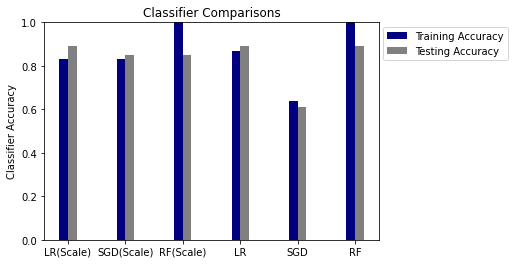

In [184]:
#Scaled Data first
labels = ['LR(Scale)', 'SGD(Scale)', 'RF(Scale)', 'LR', 'SGD', 'RF']
training_scores = [lgTrainScore, sgdTrainScore, rfTrainScore, lgTrainScore_nonNorm, sgdTrainScore_nonNorm, rfTrainScore_nonNorm]
testing_scores =  [lgTestScore, sgdTestScore, rfTestScore, lgTestScore_nonNorm, sgdTestScore_nonNorm, rfTestScore_nonNorm]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Accuracy', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing Accuracy', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Classifier Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Classifier Comparisons')
plt.show()

#My Conclusions

Of the three classifiers (logistic regression, sgd, random forest) compared in this study the logistic regression and random forest classifiers performed the best on this dataset. The logistic regression was preferable to the random forest because as the results of the chart above show, the random forest classifier overfitted to the training set reaching an accuracy of 100% for the training set in both the scaled and non-scaled data tests. SGD did not perform terribly for the scaled data but it was slightly worse then logistic and random forest.

For the comparsion between the scaled and non-scaled datasets logistic regression and random forest were only very slightly effected, if not effected at all, by the data scaling. The SGD classifier on the other hand was heavily effected by the data scaling. When the data was scaled the sgd classifier was able to produce accuracy results at on average 82 to 85 percent. When the data was not scaled the average accuracy desreased to on average between 60 and 65 percent accuracy. 

In conclusion of the three classifiers logistic regression and random forest performed best on this dataset. SGD was within range of logisitc regression and random forest in terms of model accuracy when the data was scaled, but for the orginial non-scaled dataset SGD absolutely collapsed, droping to almost random (flip of a coin) accuracy. 